In [1]:
from autumn.tools.project import get_project
from matplotlib import pyplot
from autumn.tools.plots.utils import REF_DATE
# from autumn.tools.calibration.targets import get_target_series
import pandas as pd
from autumn.tools.utils.pretty import pretty_print

from autumn.tools.plots.uncertainty.plots import _get_target_values, _plot_targets_to_axis

In [2]:
project = get_project("sm_sir", "hanoi")

In [3]:
update_params = {}
params = project.param_set.baseline.update(update_params, calibration_format=True)


In [4]:
pretty_print(params)

Params
{ 'activate_random_process': False,
  'age_groups': [0, 15, 25, 50, 70],
  'age_stratification': { 'cfr': { 'multiplier': 1.0,
                                   'source_immunity_distribution': { 'high': 0.386,
                                                                     'low': 0.302,
                                                                     'none': 0.312},
                                   'source_immunity_protection': { 'high': 0.85,
                                                                   'low': 0.5,
                                                                   'none': 0.0},
                                   'values': { 0: 1e-05,
                                               5: 1e-05,
                                               10: 1e-05,
                                               15: 1e-05,
                                               20: 4e-05,
                                               25: 4e-05,
                           

In [5]:
model = project.run_baseline_model(params)
derived_df = model.get_derived_outputs_df()

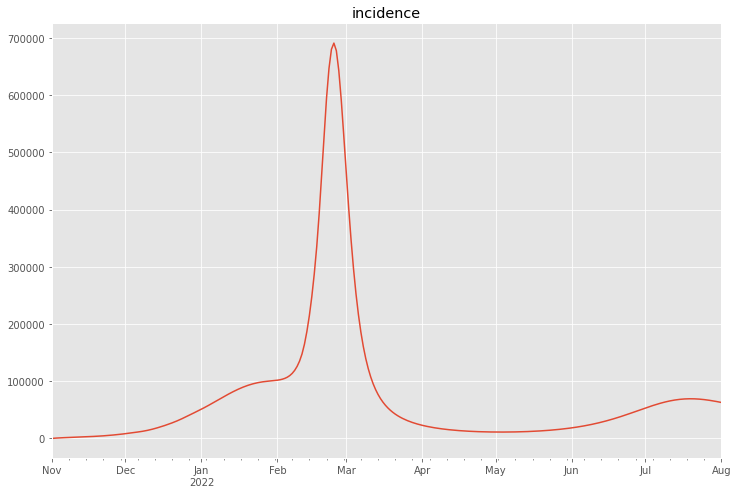

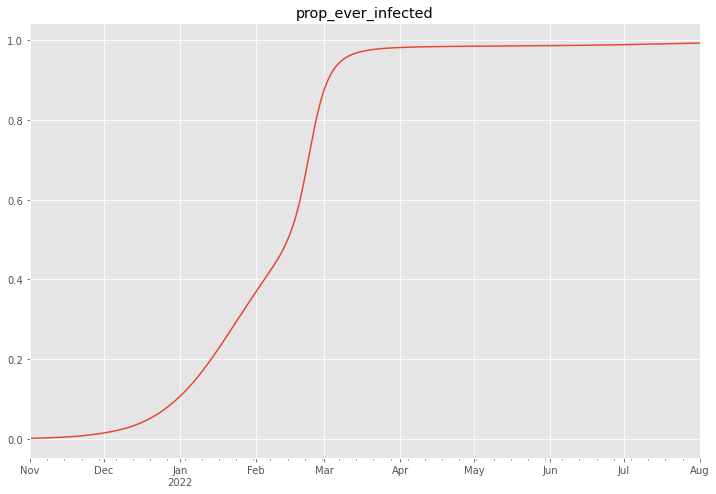

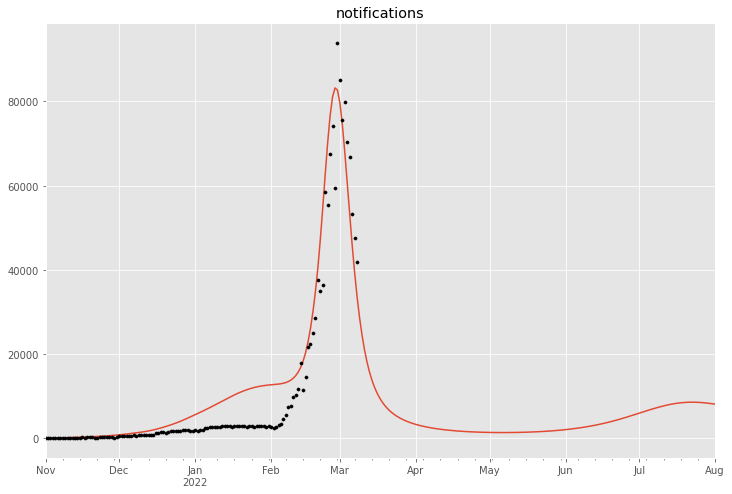

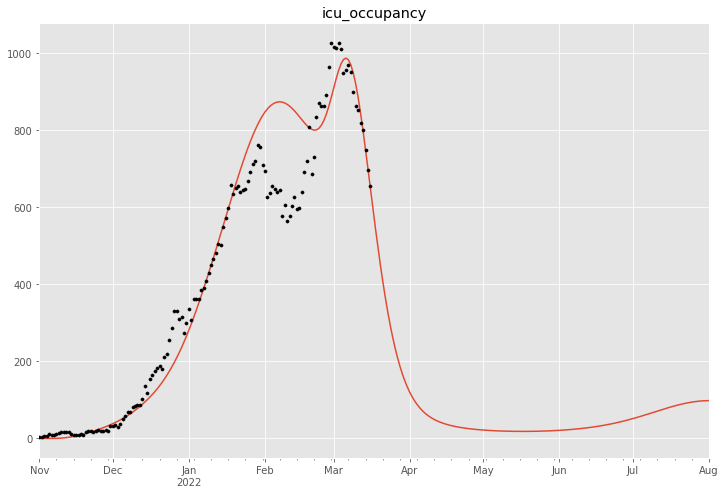

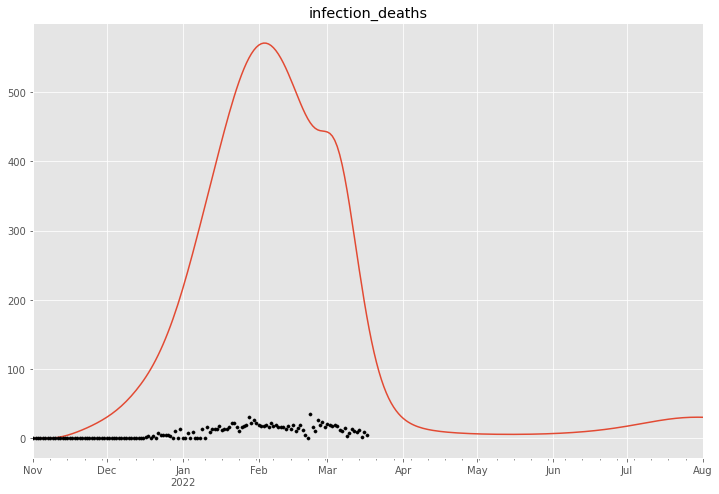

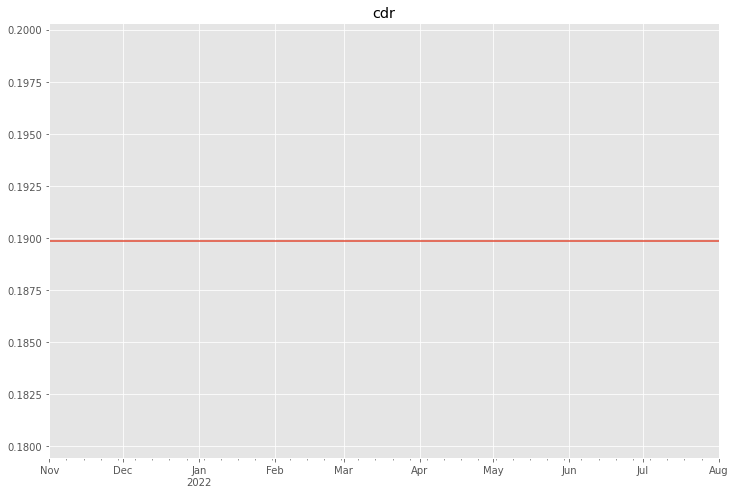

In [6]:
outputs = ["incidence",
           "prop_ever_infected",
           "notifications", 
           "icu_occupancy", 
           "infection_deaths", 
           "cdr"] #, "hospital_admissions", "hospital_occupancy", "icu_admissions", "icu_occupancy"]
for output in outputs:
    fig = pyplot.figure(figsize=(12, 8))
    pyplot.style.use("ggplot")
    axis = fig.add_subplot()

    axis = derived_df[output].plot()
    axis.set_title(output)
    
    if output in project.plots:
        values, times = _get_target_values(project.plots, output)        
        date_times = pd.to_datetime(times, origin="01Jan2020",unit="D") 
        _plot_targets_to_axis(axis, values, date_times, on_uncertainty_plot=True)

